<a href="https://colab.research.google.com/github/PAndersonSB/Projeto-1-Datascience/blob/main/Data_Science_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fonte

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Problema

A empresa automobilística chinesa Geely Auto aspira a entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis são significativas na previsão do preço de um carro
Quão bem essas variáveis descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros em todo o mercado americano.

#Objetivo de Negócio

Somos obrigados a modelar o preço dos carros com as variáveis independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado.

#Conhecendo os dados

importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
pasta = "/content/drive/My Drive/Colab Notebooks/Projeto 1/"
nome_arquivo_dados = "CarPrice_Assignment.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dados = pd.read_csv(pasta + nome_arquivo_dados ,delimiter=',')

In [4]:
dados.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


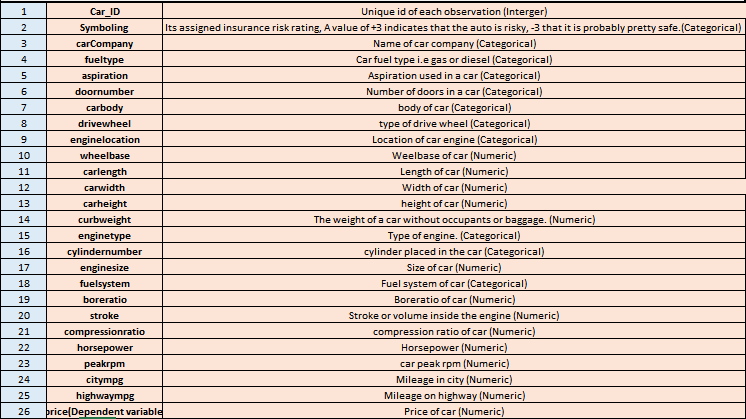

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

nenhum valor nulo em todas as colunas

In [6]:
dados.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

tipos de dados no dataset : inteiro , real e objeto(texto)

In [7]:
pd.DataFrame(data = [dados.shape[0],dados.shape[1]],index= ['linhas', 'colunas'] , columns = ['Tamanho_do_df'])

,Tamanho_do_df
linhas,205
colunas,26


In [8]:
index = [x for x in list(dados.columns)]
dicionario = dict(zip(index , range(len(index)) ) )
df_columns = dados.columns.to_frame().rename(index = dicionario, columns = {0:'colunas'})
df_columns

,colunas
0,car_ID
1,symboling
2,CarName
3,fueltype
4,aspiration
5,doornumber
6,carbody
7,drivewheel
8,enginelocation
9,wheelbase


In [9]:
valores_unicos = pd.DataFrame()
for c in list(dados.columns): #todas as colunas
  #valores_unicos = pd.concat( [valores_unicos ,pd.DataFrame( dados[c].unique()).T] )
  valores_unicos[c] = pd.DataFrame( dados[c].unique())

In [10]:
valores_unicos

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,1.0,alfa-romero stelvio,diesel,turbo,four,hatchback,fwd,rear,94.5,...,152.0,2bbl,2.68,3.47,10.0,154.0,5500.0,19.0,26.0,16500.0
2,3,2.0,alfa-romero Quadrifoglio,NaN,NaN,NaN,sedan,4wd,NaN,99.8,...,109.0,mfi,3.19,3.40,8.0,102.0,5800.0,24.0,30.0,13950.0
3,4,0.0,audi 100 ls,NaN,NaN,NaN,wagon,NaN,NaN,99.4,...,136.0,1bbl,3.13,2.80,8.5,115.0,4250.0,18.0,22.0,17450.0
4,5,-1.0,audi 100ls,NaN,NaN,NaN,hardtop,NaN,NaN,105.8,...,131.0,spfi,3.50,3.19,8.3,110.0,5400.0,17.0,25.0,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores unicos de todas as colunas

In [11]:
dados.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [12]:
dados.describe().round(2)['price'].to_frame()

,price
count,205.00
mean,13276.71
std,7988.85
min,5118.00
25%,7788.00
50%,10295.00
75%,16503.00
max,45400.00


#Funções

##Pandas

In [13]:
def distruibuicao_de_frequencia(coluna):
  frequencia = dados[coluna].value_counts()
  percentual = dados[coluna].value_counts(normalize = True) * 100
  df = pd.DataFrame({'Frequencia':frequencia , 'Percentual (%)':percentual.round(2)})
  df.rename_axis(str(coluna) , axis = 1, inplace = True)

  return df

In [14]:
def distruibuicao_crosstab(coluna1 , coluna2):
  df = pd.crosstab(dados[coluna1], dados[coluna2] )
  return df

In [15]:
def distruibuicao_crosstab2(coluna1 , coluna2, coluna3):
  df = pd.crosstab(dados[coluna1],
                   dados[coluna2],
                   aggfunc = 'mean' , #media
                   values = dados[coluna3] )  #costuma ser a variavel dependente ex: preço
  return df

##Pyplot

In [16]:
def graf_pizza(df, titulo, explode):
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.pie(list(df['Frequencia']), 
        explode = explode , 
        labels=list(df.index),
        autopct='%1.1f%%',
        shadow=True, startangle=90)

  ax.axis('equal')
  ax.set_title(f'Distribuicao do atributo {titulo}', fontsize=18)
  plt.show()
  return ax

In [17]:
def graf_pizza_cross(df, titulo, explode):
  ###### criando data frame para fazer plotagem
  #valores
  
  frequencia = []
  for x in range(len(df)): 
    for i in range(len(df.iloc[0])):
      frequencia.append(df.iloc[x][i])

  #indices
  index = []
  for x in range(len(df.index)):
    for i in range(len(df.columns)):
      index.append(df.index[x] +'/'+ df.columns[i])
  
  df =pd.DataFrame({'Frequencia': frequencia},index = index)

  #############plotagem
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.pie(list(df['Frequencia']), 
        explode = explode , 
        labels=list(df.index),
        autopct='%1.1f%%',
        shadow=True, startangle=90)

  ax.axis('equal')
  ax.set_title(f'Distribuicao do atributo {titulo}', fontsize=18)
  plt.show()
  return ax

#Estatistica descritiva

##variaveis qualitativas

In [18]:
distruibuicao_de_frequencia('aspiration')

aspiration,Frequencia,Percentual (%)
std,168,81.95
turbo,37,18.05


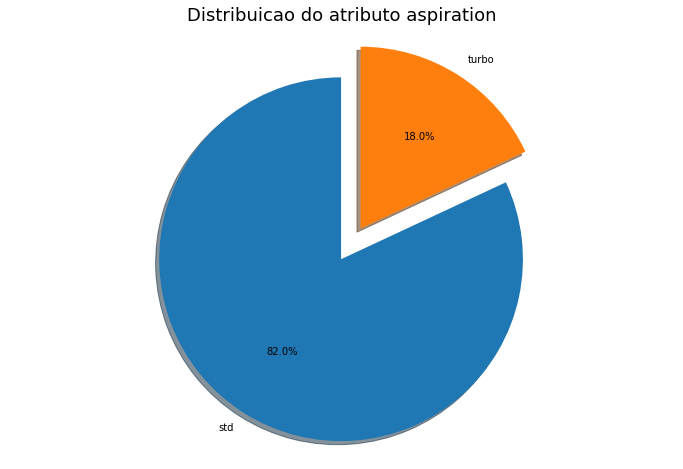

In [19]:
graf_pizza(distruibuicao_de_frequencia('aspiration') , 'aspiration', (0,0.2))

A quantidade de carros turbo é bem menor que o de carros std

In [20]:
distruibuicao_de_frequencia('fueltype')

fueltype,Frequencia,Percentual (%)
gas,185,90.24
diesel,20,9.76


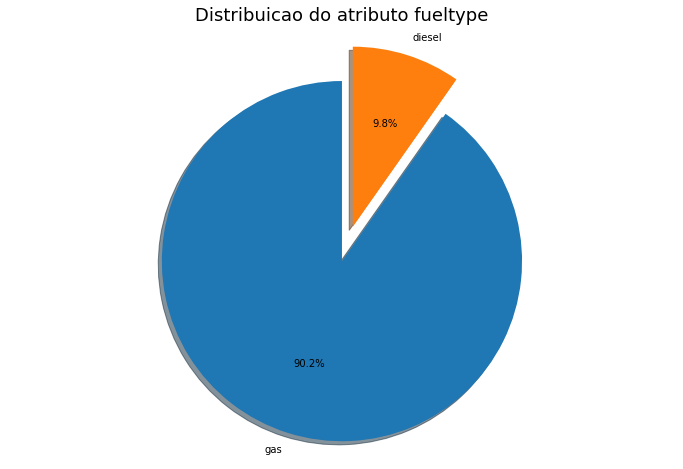

In [21]:
graf_pizza(distruibuicao_de_frequencia('fueltype'), 'fueltype', (0,0.2))

A quantidade de carros a diesel é bem menor que o de carros a gasolina

In [22]:
distruibuicao_crosstab('aspiration', 'fueltype')

fueltype,diesel,gas
aspiration,,
std,7,161
turbo,13,24


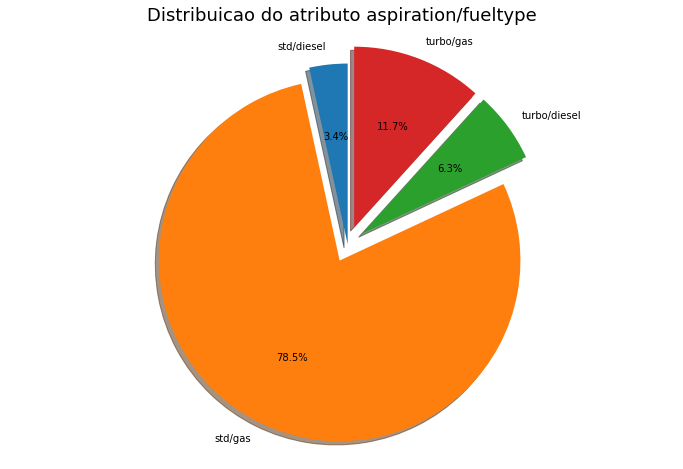

In [23]:
graf_pizza_cross(distruibuicao_crosstab('aspiration', 'fueltype') ,'aspiration/fueltype' ,(0,0.1,0.1,0.1) )

mesmo a quantidade de carros std sendo maior que a turbo , a quatidade de carros std que usa combustivel diesel é menor que o de carros turbo com combustivel diesel.

In [24]:
distruibuicao_crosstab2('aspiration', 'fueltype' , 'price')

fueltype,diesel,gas
aspiration,,
std,9670.571429,12739.127329
turbo,19159.153846,14748.465292


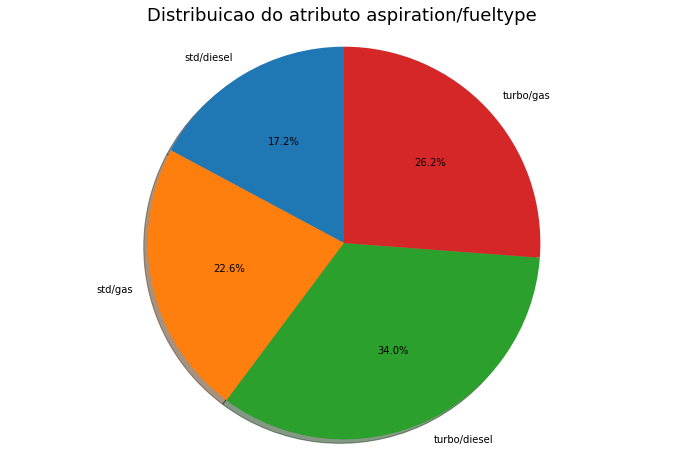

In [25]:
graf_pizza_cross(distruibuicao_crosstab2('aspiration', 'fueltype' , 'price') ,'aspiration/fueltype' ,(0,0,0,0) )

a média do preço dos carros.

enquanto a combinação turbo/diesel tem valor maior que turbo/gas

a combinação std/diesel tem valor menor que std/gas.

In [26]:
distruibuicao_de_frequencia('doornumber')

doornumber,Frequencia,Percentual (%)
four,115,56.1
two,90,43.9


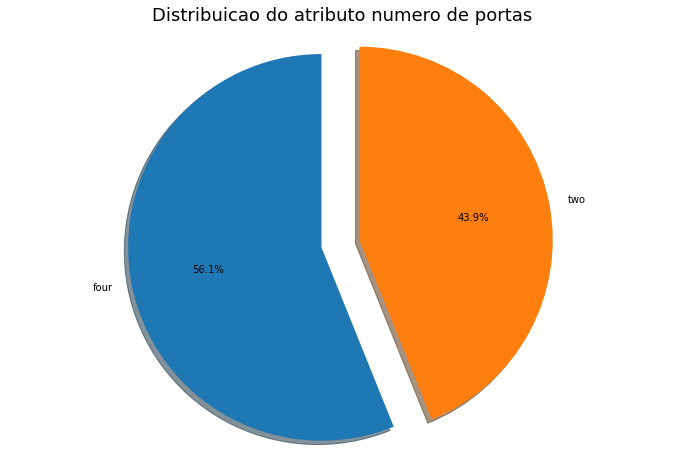

In [27]:
graf_pizza(distruibuicao_de_frequencia('doornumber') , 'numero de portas', (0,0.2))

In [28]:
distruibuicao_de_frequencia('carbody')

carbody,Frequencia,Percentual (%)
sedan,96,46.83
hatchback,70,34.15
wagon,25,12.20
hardtop,8,3.90
convertible,6,2.93


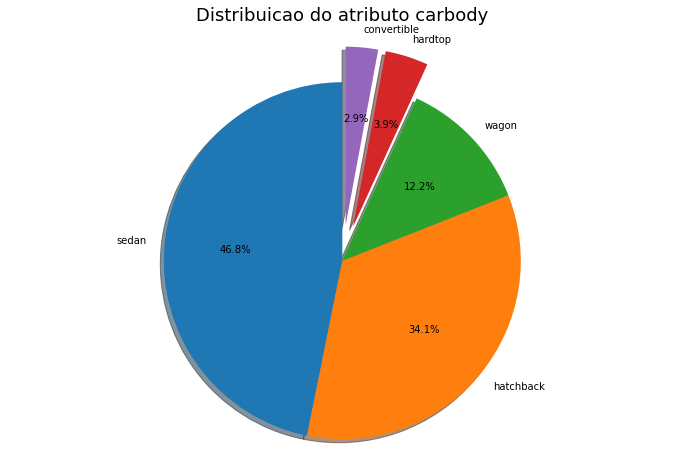

In [29]:
graf_pizza(distruibuicao_de_frequencia('carbody') , 'carbody', (0,0,0,0.2,0.2))

In [30]:
distruibuicao_de_frequencia('drivewheel')

drivewheel,Frequencia,Percentual (%)
fwd,120,58.54
rwd,76,37.07
4wd,9,4.39


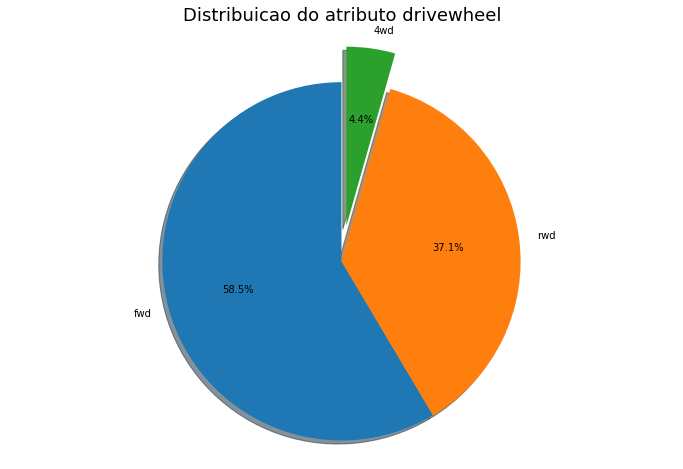

In [31]:
graf_pizza(distruibuicao_de_frequencia('drivewheel') , 'drivewheel', (0,0,0.2))

In [32]:
distruibuicao_de_frequencia('cylindernumber')

cylindernumber,Frequencia,Percentual (%)
four,159,77.56
six,24,11.71
five,11,5.37
eight,5,2.44
two,4,1.95
three,1,0.49
twelve,1,0.49


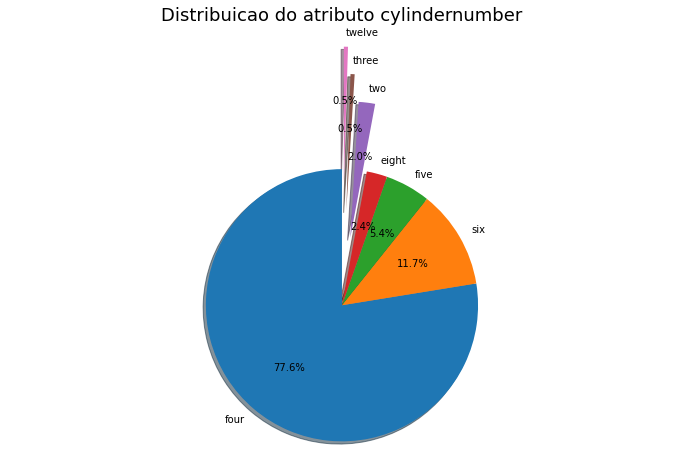

In [33]:
graf_pizza(distruibuicao_de_frequencia('cylindernumber') , 'cylindernumber', (0,0,0,0,0.5,0.7,0.9))

In [34]:
distruibuicao_de_frequencia('enginelocation')

enginelocation,Frequencia,Percentual (%)
front,202,98.54
rear,3,1.46


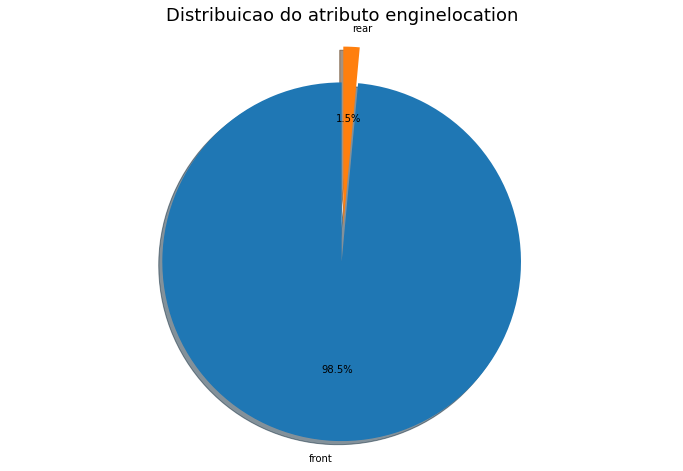

In [35]:
graf_pizza(distruibuicao_de_frequencia('enginelocation') , 'enginelocation', (0,0.2))

In [36]:
distruibuicao_de_frequencia('fuelsystem')

fuelsystem,Frequencia,Percentual (%)
mpfi,94,45.85
2bbl,66,32.20
idi,20,9.76
1bbl,11,5.37
spdi,9,4.39
4bbl,3,1.46
mfi,1,0.49
spfi,1,0.49


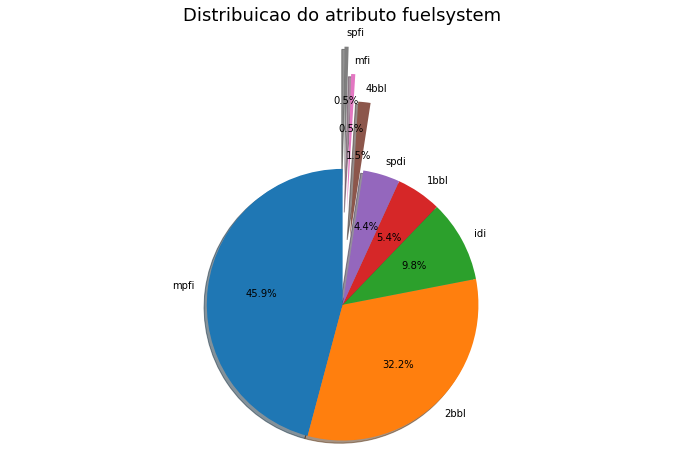

In [37]:
graf_pizza(distruibuicao_de_frequencia('fuelsystem') , 'fuelsystem', (0,0,0,0,0,0.5,0.7,0.9))

##Variaveis quantitativas

distruibuindo os valores em classes 

In [38]:
dados.price.min()

5118.0

In [39]:
dados.price.max()

45400.0

In [40]:
classes = [5110,25259,454041]

In [41]:
labels =['b','a']

In [42]:
frequencia = pd.value_counts(
  pd.cut(x = dados.price,
         bins = classes,
         labels = labels,
         include_lowest = True)
)

In [43]:
percentual = pd.value_counts(
  pd.cut(x = dados.price,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)

In [44]:
df = pd.DataFrame(
    {'Frequencia': frequencia, 'Porcentagem (%)': percentual}
)
df

,Frequencia,Porcentagem (%)
b,187,0.912195
a,18,0.087805


metodo 2

In [45]:
n = dados.shape[0]
n

205

In [46]:
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

9

In [47]:
frequencia = pd.value_counts(
  pd.cut(
    x = dados.price,
    bins = 9,
    include_lowest = True
  ),
  sort = False
)

In [48]:
percentual = pd.value_counts(
  pd.cut(
    x = dados.price,
    bins = 9,
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

In [49]:
df = pd.DataFrame(
    {'Frequencia': frequencia, 'Porcentagem (%)': percentual.round(2)}
)
df

,Frequencia,Porcentagem (%)
"(5077.717, 9593.778]",92,0.45
"(9593.778, 14069.556]",46,0.22
"(14069.556, 18545.333]",36,0.18
"(18545.333, 23021.111]",11,0.05
"(23021.111, 27496.889]",3,0.01
"(27496.889, 31972.667]",5,0.02
"(31972.667, 36448.444]",7,0.03
"(36448.444, 40924.222]",2,0.01
"(40924.222, 45400.0]",3,0.01


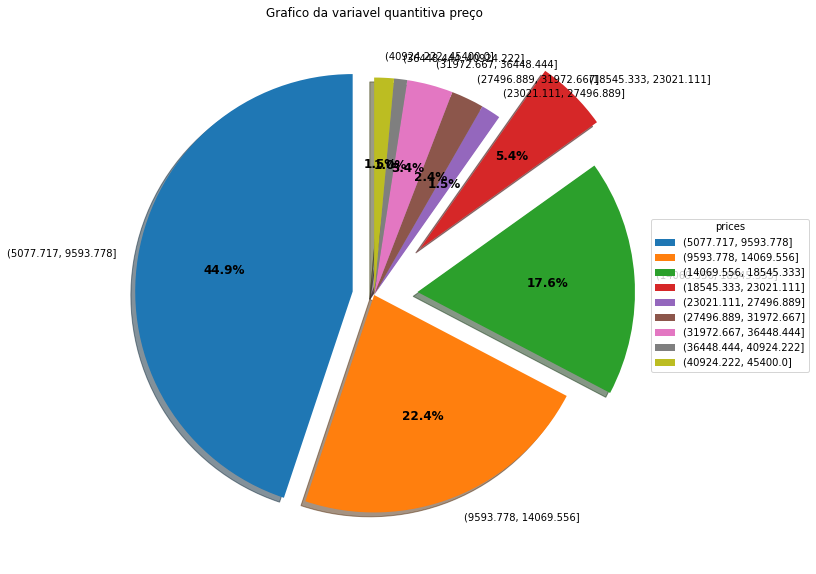

In [50]:
prices = [str(x) for x in list(df.index)] 
data = df['Frequencia']
  
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0 , 0.0 , 0.0 ,0.0) 

def func(pct, allvalues): 
    return "{:.1f}%".format(pct)
    
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = prices, 
                                  shadow = True,                                   
                                  startangle = 90) 
ax.legend(wedges, prices, 
          title ="prices", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Grafico da variavel quantitiva preço") 
plt.show() 

#Análises gráficas

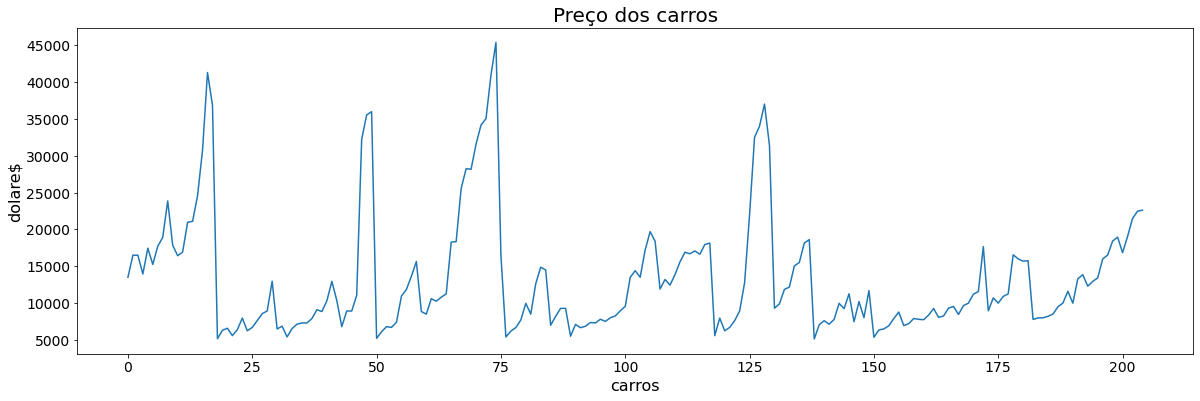

In [51]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Preço dos carros', fontsize=20)
ax.set_ylabel('dolare$', fontsize=16)
ax.set_xlabel('carros', fontsize=16)
ax = dados['price'].plot(fontsize=14)

comportamento da variavel dependente y

## boxplot

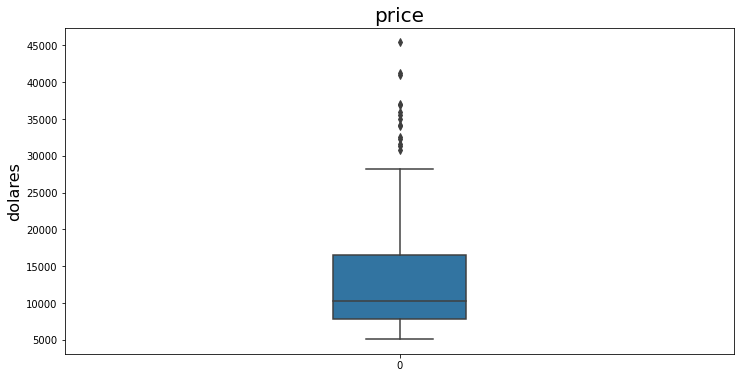

In [52]:
ax = sns.boxplot(data=dados['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('price', fontsize=20)
ax.set_ylabel('dolares', fontsize=16)
ax

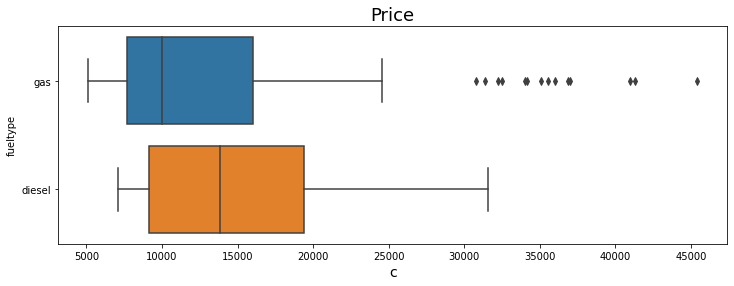

In [53]:
ax = sns.boxplot(y = 'fueltype', x = 'price', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Price', fontsize=18)
ax.set_xlabel('c', fontsize=14)
ax

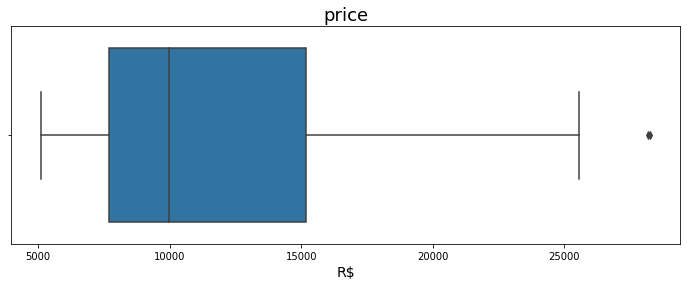

In [54]:
ax = sns.boxplot(x = 'price', data = dados.query('price < 30000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('price', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

##Histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


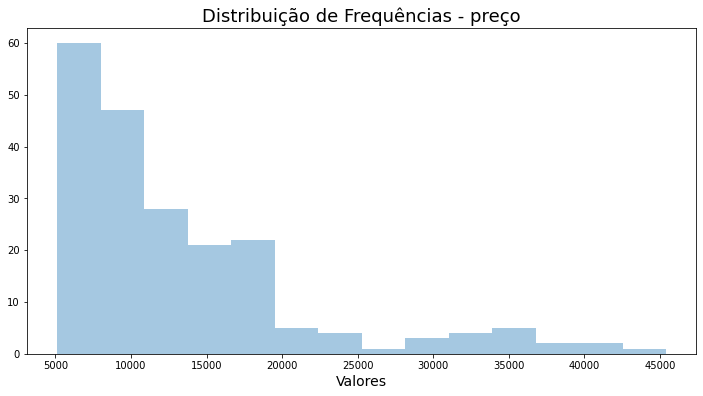

In [55]:
ax = sns.distplot(dados.price, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - preço', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)
ax

os dados tem uma assimetria à direita

In [56]:
valor = dados['price']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


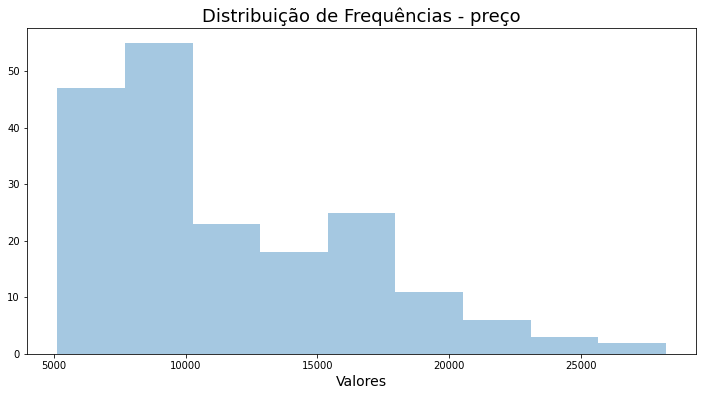

In [57]:
ax = sns.distplot(dados[selecao].price, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - preço', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)
ax

analisar mais os dados ou separar os dados em carros de baixo/alto padrão

#Machine learning.

##tratando dados

In [58]:
dados.iloc[:, [2 ,3, 4, 5 ,6 ,7 ,8 ,14 ,15 ,17]]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [59]:
dict = {'gas': 1, 'diesel': 2}
dados['fueltype'] = dados['fueltype'].map(dict)

In [60]:
dict = {'std': 1, 'turbo': 2}
dados['aspiration'] = dados['aspiration'].map(dict)

In [61]:
dict = {'two': 2, 'four': 4}
dados['doornumber'] = dados['doornumber'].map(dict)

In [62]:
dict = {'convertible': 1, 'hatchback': 2 ,'sedan': 3,'wagon': 4,'hardtop': 5}
dados['carbody'] = dados['carbody'].map(dict)

In [63]:
dict = {'rwd': 1, 'fwd': 2 ,'4wd': 3}
dados['drivewheel'] = dados['drivewheel'].map(dict)

In [64]:
dict = {'front': 1, 'rear': 2}
dados['enginelocation'] = dados['enginelocation'].map(dict)

In [65]:
dict = {'dohc': 1, 'ohcv': 2 ,'ohc': 3,'l': 4,'rotor': 5 ,'ohcf':6 ,'dohcv':7}
dados['enginetype'] = dados['enginetype'].map(dict)

In [66]:
dict = {'four': 4, 'six': 6 ,'five': 5,'three': 3,'twelve': 12 ,'two':2 ,'eight':8}
dados['cylindernumber'] = dados['cylindernumber'].map(dict)

In [67]:
dict = {'mpfi': 1, '2bbl': 2 ,'mfi': 3,'1bbl': 4,'spfi': 5 ,'4bbl':6 ,'idi':7 ,'spdi':8}
dados['fuelsystem'] = dados['fuelsystem'].map(dict)

##correlação e escolhendo colunas

In [68]:
correlacao= dados.corr()

###correlação *grafico*

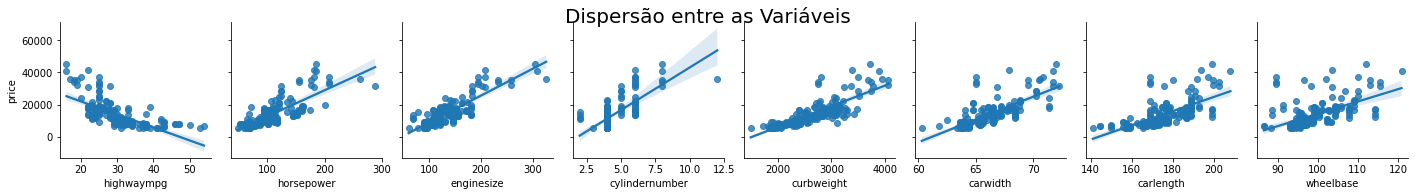

In [69]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['highwaympg' ,'horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ,'carwidth' ,'carlength' ,'wheelbase'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

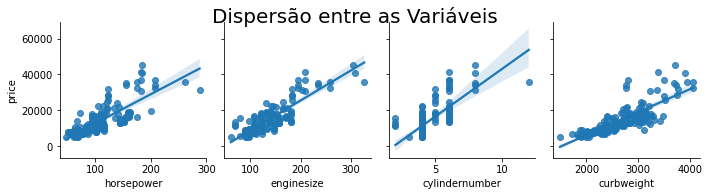

In [70]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

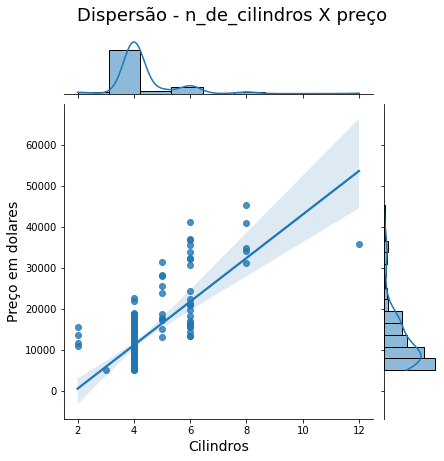

In [71]:
ax = sns.jointplot(x="cylindernumber", y="price", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - n_de_cilindros X preço', fontsize=18, y=1.05)
ax.set_axis_labels("Cilindros", "Preço em dolares", fontsize=14)
ax

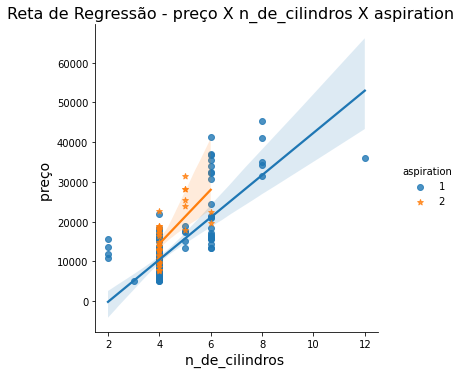

In [72]:
ax = sns.lmplot(x="cylindernumber", y="price", data=dados, hue="aspiration", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - preço X n_de_cilindros X aspiration', fontsize=16, y=1.02)
ax.set_xlabels("n_de_cilindros ", fontsize=14)
ax.set_ylabels("preço ", fontsize=14)
ax.add_legend(title="aspiration")
ax

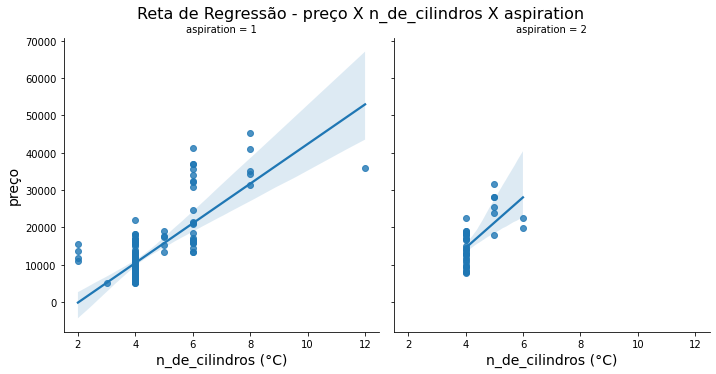

In [73]:
ax = sns.lmplot(x="cylindernumber", y="price", data=dados, col="aspiration")
ax.fig.suptitle('Reta de Regressão - preço X n_de_cilindros X aspiration', fontsize=16, y=1.02)
ax.set_xlabels("n_de_cilindros (°C)", fontsize=14)
ax.set_ylabels("preço", fontsize=14)
ax

###colunas x y

In [74]:
#0,69  0,8  0,8  0,71 0,8 0.7 0,68 0.5
X = dados[['highwaympg' ,'horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ,'carwidth' ,'carlength' ,'wheelbase']]
y = dados['price']

In [75]:
# X  0,8  0,8 0,71 0,8 X X X
X = dados[['horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ]]
y = dados['price']

##regressao

In [76]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

print('R² = {}'.format(regr.score(X_train, y_train).round(2)))

R² = 0.83


gerando modelo e score usando o dados de treino

In [79]:
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_[0])
print("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('R² = %s' % r2_score(y_test, y_pred).round(2))

Coefficients: 
 52.27104581509909
Intercept: 
 -13669.93725967238
Mean squared error: 13843283.08
Coefficient of determination: 0.79
R² = 0.79


score usando o dados de teste

##Mais testes

In [80]:
regr.intercept_

-13669.93725967238

In [81]:
regr.coef_

array([52.27104582, 75.76231327, 36.1698097 ,  4.56802287])

In [82]:
X.columns

Index(['horsepower', 'enginesize', 'cylindernumber', 'curbweight'], dtype='object')

In [83]:
index=['Intercepto', 'horsepower', 'enginesize', 'cylindernumber', 'curbweight']

In [84]:
pd.DataFrame(data=np.append(regr.intercept_, regr.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,-13669.937260
horsepower,52.271046
enginesize,75.762313
cylindernumber,36.169810
curbweight,4.568023


##grafico

In [85]:
import plotly.graph_objects as go

In [86]:
fig = go.Figure(go.Scatter(x=dados['price'].index , y=dados['price'].values , name='Dados Reais',mode='markers'))
fig.add_trace(go.Scatter(x=dados['price'].index , y=regr.predict(X), name='Regressão Linear'))

fig.show()

**CARACA QUE MANEIRO**

In [87]:
y_pred_train = regr.predict(X_train)

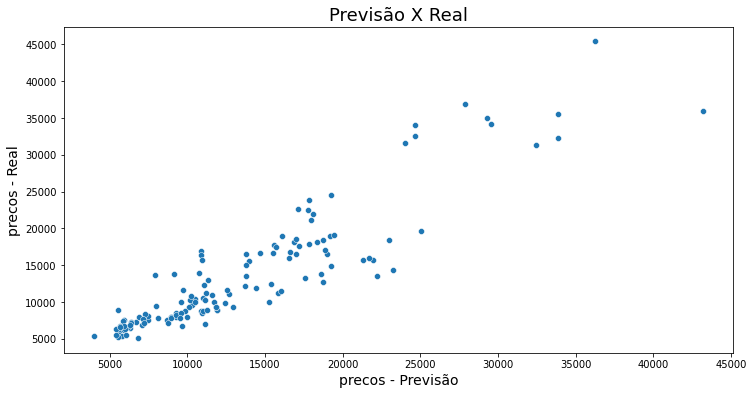

In [88]:
ax = sns.scatterplot(x=y_pred_train, y=y_train )
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('precos - Previsão', fontsize=14 ,)
ax.set_ylabel('precos - Real', fontsize=14)
ax

In [89]:
residuo = y_train - y_pred_train

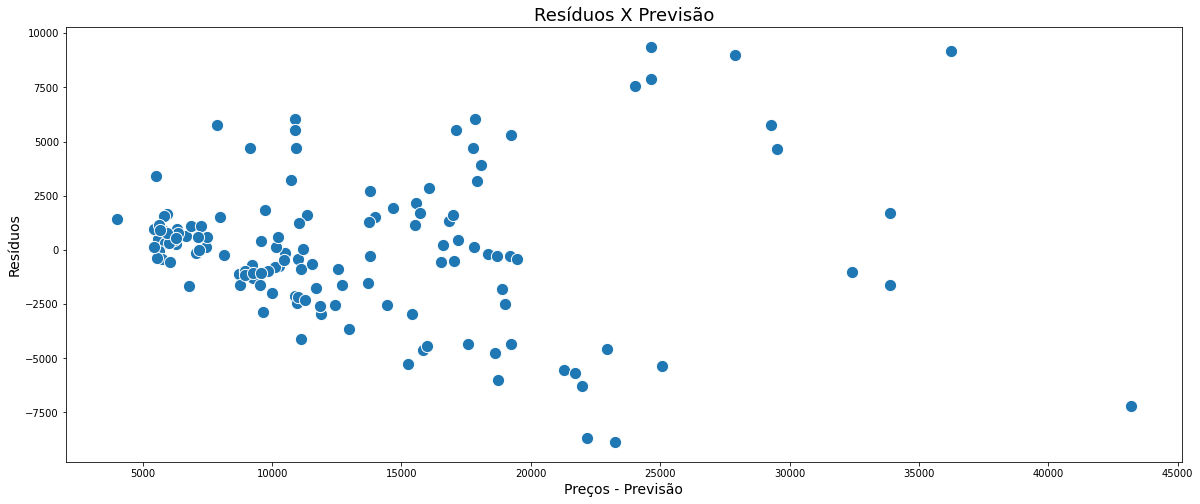

In [90]:
ax = sns.scatterplot(x=y_pred_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preços - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

metricas

In [91]:
EQM = mean_squared_error(y_test, y_pred).round(2)
REQM = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
R2 = r2_score(y_test, y_pred).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,13843283.08
REQM,3720.66
R²,0.79


#salvando modelo

In [92]:
import pickle

In [93]:
output = open('modelo_carros', 'wb')
pickle.dump(regr, output)
output.close()